# Problem Statement:
    


To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

In [2]:
#importing necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [21]:
# Reading data set to python environment
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
# checking basic details of dataset
data.shape

(8124, 23)

In [23]:
len(data)

8124

In [24]:
#checking for null values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [25]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [26]:
#to find the unique values in each column
col = data.columns
for i in col:
    print(i,data[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


From above we can see that the stalk-root column contains a "?" and we might assume it is for unknown values. So we can fill them with mode since it is a catagorical data 

In [30]:
#filling the unknown values with mode
unknown = data.loc[(data['stalk-root']=='?')]

In [32]:
pos = unknown.index
pos

Int64Index([3984, 4023, 4076, 4100, 4104, 4196, 4200, 4283, 4291, 4326,
            ...
            8113, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123],
           dtype='int64', length=2480)

In [33]:
m = data['stalk-root'].mode()
m

0    b
dtype: object

In [40]:
data['stalk-root'][pos] = 'b'

In [41]:
data['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

Since our data is catagorical we need to perform some encoding for better results. Here we are using LabelEncoding from scikit learn

In [42]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now let us check the correlation map to understand more on feature relations

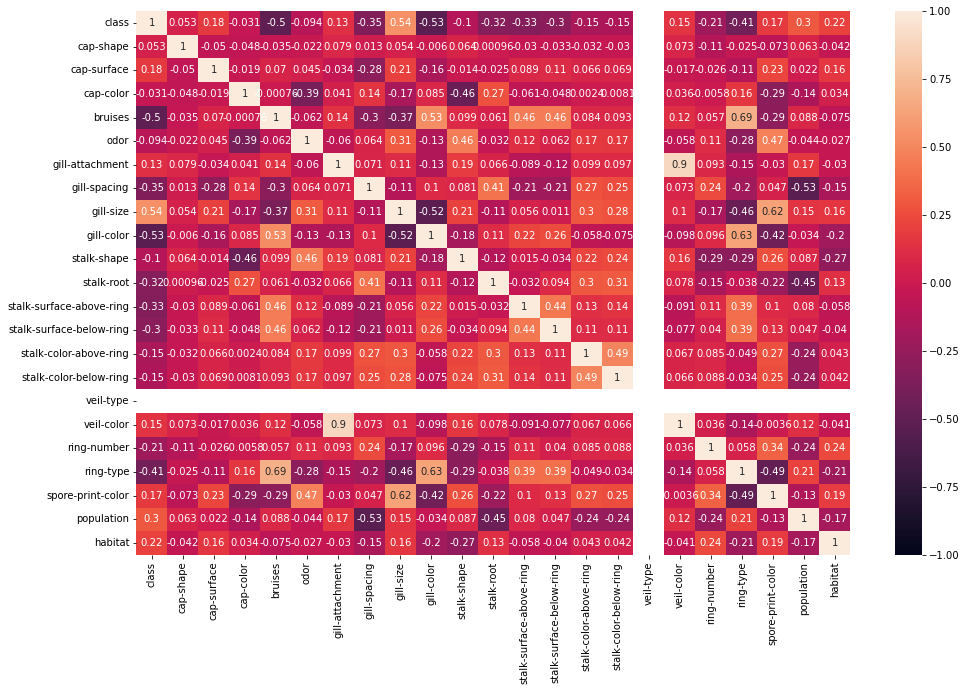

In [43]:
#plotting heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,vmin=-1)
plt.show()

It is clear from the above plot that the column 'veil-type' does not contribute anything to the data. So we can drop the column

In [44]:
data.drop(['veil-type'],axis=1,inplace=True)

Now we are almost ready to fit data for modelling. We can check for the best suited model 

In [49]:
# taking target and feature as x and y
X = data.drop(['class'],axis=1)
y = data.iloc[:,0].values

In [50]:
#splitting the model for trainig and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
import warnings
warnings.filterwarnings('ignore')

1. Logistic Regression

In [51]:
# fitting model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
# prediction
pred = lr.predict(X_test)

In [58]:
# checking efficiancy
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ::",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy is :: 0.9576563269325455
[[993  47]
 [ 39 952]]


2. Decision Tree Classification

In [59]:
# Fitting model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [60]:
#prediction
pred = dt.predict(X_test)

In [61]:
# checking efficiancy
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ::",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy is :: 1.0
[[1040    0]
 [   0  991]]


3. Random Forest classifier

In [62]:
#fitting model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
#prediction
pred = dt.predict(X_test)

In [64]:
# checking efficiancy
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ::",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy is :: 1.0
[[1040    0]
 [   0  991]]


4. KNN

In [66]:
# Checking for best k value
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pred = Classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

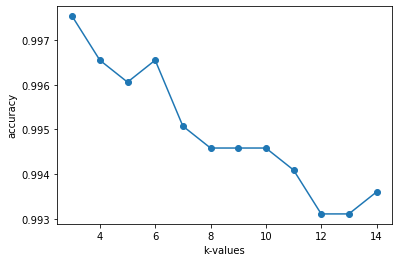

In [67]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

In [68]:
# taking k as 3 and fitting model
Classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
Classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [69]:
# prediction
pred = Classifier.predict(X_test)

In [70]:
# checking efficiancy
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ::",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy is :: 0.9975381585425899
[[1037    3]
 [   2  989]]


5. Naive Bayes Classification

 Gaussian

In [72]:
#fitting model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)


GaussianNB()

In [73]:
# prediction
pred = classifier.predict(X_test)

In [74]:
# checking efficiancy
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ::",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy is :: 0.9049729197439685
[[942  98]
 [ 95 896]]


Bernoulli

In [75]:
# fitting model
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB()

In [76]:
# prediction
pred = classifier.predict(X_test)

In [77]:
# checking efficiancy
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ::",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy is :: 0.8394879369768586
[[979  61]
 [265 726]]


From trying multiple ML models Random Forest and Decision Tree are best suited for the given problem since they are giving 100% accuracy. 